In [1]:
from marubatsu import Marubatsu
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math

def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # 変更ボタンを作成する
        change_button = widgets.Button(
            description="変更",
            layout=widgets.Layout(width="100px"),
        )
        
        # リセットボタンを作成する
        reset_button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = widgets.Button(
            description="<<",
            layout=widgets.Layout(width="100px"),
        )
        prev_button = widgets.Button(
            description="<",
            layout=widgets.Layout(width="100px"),
        )
        next_button = widgets.Button(
            description=">",
            layout=widgets.Layout(width="100px"),
        )
        last_button = widgets.Button(
            description=">>",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

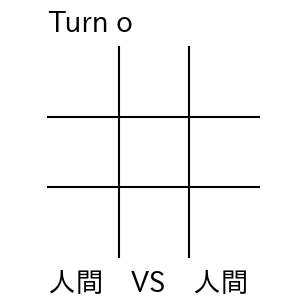

In [2]:
from util import gui_play

gui_play()

In [3]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = create_button("<<", 100)
        prev_button = create_button("<", 100)
        next_button = create_button(">", 100)
        last_button = create_button(">>", 100)
        
        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

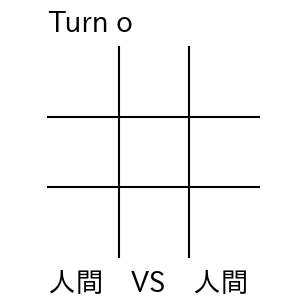

In [4]:
gui_play()

In [5]:
from copy import deepcopy

def restart(self):
    self.initialize_board()
    self.turn = Marubatsu.CIRCLE     
    self.move_count = 0
    self.status = Marubatsu.PLAYING
    self.last_move = -1, -1          
    self.last_turn = None
    self.records = []
    self.board_records = []

Marubatsu.restart= restart

def move(self, x, y):
    if self.place_mark(x, y, self.turn):
        self.last_turn = self.turn
        self.turn = Marubatsu.CROSS if self.turn == Marubatsu.CIRCLE else Marubatsu.CIRCLE  
        self.move_count += 1
        self.status = self.judge()
        self.last_move = x, y
        self.records.append(self.last_move)
        self.board_records.append(deepcopy(self.board))
        
Marubatsu.move = move

In [6]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = create_button("<<", 100)
        prev_button = create_button("<", 100)
        next_button = create_button(">", 100)
        last_button = create_button(">>", 100)
        
        def change_step(step):
            # step 手目のゲーム盤のデータをコピーし、board に代入する
            self.board = deepcopy(self.board_records[step])
            # 描画を更新する
            self.draw_board(ax, ai)
        
        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

In [7]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = create_button("<<", 100)
        prev_button = create_button("<", 100)
        next_button = create_button(">", 100)
        last_button = create_button(">>", 100)
        
        def change_step(step):
            # step 手目のゲーム盤のデータを board に代入する
            self.board = self.board_records[step]
            # 描画を更新する
            self.draw_board(ax, ai)
        
        def on_first_button_clicked(b):
            change_step(0)

        first_button.on_click(on_first_button_clicked)

        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

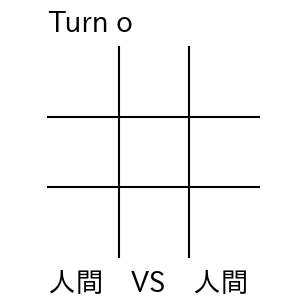

IndexError: list index out of range

In [8]:
gui_play()

In [9]:
def restart(self):
    self.initialize_board()
    self.turn = Marubatsu.CIRCLE     
    self.move_count = 0
    self.status = Marubatsu.PLAYING
    self.last_move = -1, -1          
    self.last_turn = None
    self.records = []
    self.board_records = [deepcopy(self.board)]

Marubatsu.restart = restart

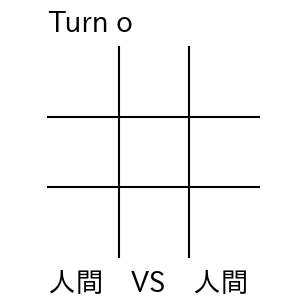

In [11]:
gui_play()

In [12]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = create_button("<<", 100)
        prev_button = create_button("<", 100)
        next_button = create_button(">", 100)
        last_button = create_button(">>", 100)
        
        def change_step(step):
            # step 手目のゲーム盤のデータをコピーし、board に代入する
            self.board = deepcopy(self.board_records[step])
            # 手番を計算する。step が偶数の場合は 〇 の 手番
            self.turn = Marubatsu.CIRCLE if step % 2 == 0 else Marubatsu.CROSS
            # status 属性を judget を使って計算する
            self.status = self.judge()
            # 描画を更新する
            self.draw_board(ax, ai)
        
        def on_first_button_clicked(b):
            change_step(0)

        first_button.on_click(on_first_button_clicked)

        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

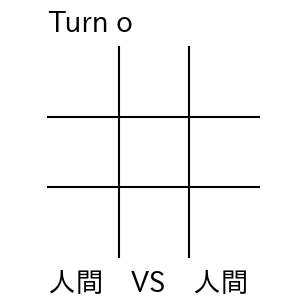

In [13]:
gui_play()

In [14]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = create_button("<<", 100)
        prev_button = create_button("<", 100)
        next_button = create_button(">", 100)
        last_button = create_button(">>", 100)
        
        def change_step(step):
            # step 手目のゲーム盤のデータをコピーし、board に代入する
            self.board = deepcopy(self.board_records[step])
            # 手数を表す step を move_count に代入する
            self.move_count = step
            # 手番を計算する。step が偶数の場合は 〇 の 手番
            self.turn = Marubatsu.CIRCLE if step % 2 == 0 else Marubatsu.CROSS
            # status 属性を judget を使って計算する
            self.status = self.judge()
            # 描画を更新する
            self.draw_board(ax, ai)
        
        def on_first_button_clicked(b):
            change_step(0)

        first_button.on_click(on_first_button_clicked)

        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

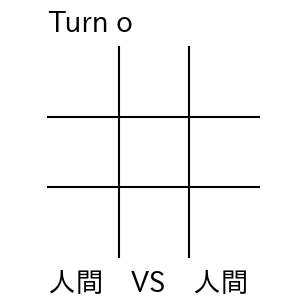

In [15]:
gui_play()

In [16]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        first_button = create_button("<<", 100)
        prev_button = create_button("<", 100)
        next_button = create_button(">", 100)
        last_button = create_button(">>", 100)
        
        def change_step(step):
            # step 手目のゲーム盤のデータをコピーし、board に代入する
            self.board = deepcopy(self.board_records[step])
            # 手数を表す step を move_count に代入する
            self.move_count = step
            # 手番を計算する。step が偶数の場合は 〇 の 手番
            self.turn = Marubatsu.CIRCLE if step % 2 == 0 else Marubatsu.CROSS
            # status 属性を judget を使って計算する
            self.status = self.judge()
            # 描画を更新する
            self.draw_board(ax, ai)
        
        def on_first_button_clicked(b):
            change_step(0)

        def on_prev_button_clicked(b):
            change_step(self.move_count - 1)

        def on_next_button_clicked(b):
            change_step(self.move_count + 1)
            
        def on_last_button_clicked(b):
            change_step(len(self.board_records) - 1)

        first_button.on_click(on_first_button_clicked)
        prev_button.on_click(on_prev_button_clicked)
        next_button.on_click(on_next_button_clicked)
        last_button.on_click(on_last_button_clicked)

        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([first_button, prev_button, next_button, last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

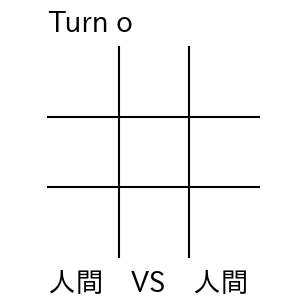

In [18]:
gui_play()